# Jeu du oxo

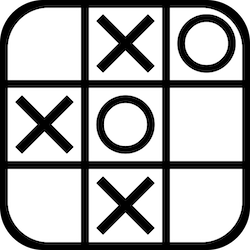

## 1. Contexte

Le __Jeu du oxo__ (aussi appelé ___Jeu du morpion___ ou ___tic-tac-toe___) est un jeu de réflexion se pratiquant à deux joueurs au tour par tour dont le but est de créer le premier un alignement.

## 2. Modélisation de la grille de jeu

Nous allons définir une classe `Grille` dans un module `grille.py`, qui sera un objet utilisable pour le jeu du oxo.

### 2.1. Interface

Cette classe devra fournir une _interface_, i.e un ensemble de méthodes utilisables pour un développeur / utilisateur :

- construire une grille vide de dimension 3x3,
- placer un pion dans une case, à condition que le coup soit valide bien entendu,
- afficher la grille
- savoir si la partie est terminée :
  - soit parce que la grille est pleine,
  - soit parce qu'un joueur a gagné.

Pour cela, nous aurons besoin de fonctions annexes pour :

- lire la valeur d'une case dans la grille,
- savoir si les coordonnées proposées pour jouer sont bien dans la grille,
- savoir si la grille est pleine,
- savoir si une ligne contient un alignement de pions,
- savoir si une colonne contient un alignement de pions,
- savoir si une diagonale contient un alignement de pions,
- savoir si un joueur a gagné.

### 2.2 Spécifications détaillées

#### 2.2.1. Construction d'une grille vide

La __construction d'une grille vide__ s'effectue par le constructeur de la classe `Grille`. Il prend en paramètre la largeur et hauteur de la grille, valant 3 par défaut.

#### 2.2.2. Test de validité d'une coordonnée

La __validité d'une coordonnée__ s'effectue par une méthode de classe `est_valide`, qui prend en paramètre un couple de coordonnées sous la forme $(x, y)$ et indique si la coordonnée est dans les bornes d'acceptabilité ($x$ correspond à un numéro de colonne entre 0 et la largeur de la grille, $y$ correspond à un numéro de ligne entre 0 et la hauteur de la grille).

```python
:exemples:
>>> g = Grille(2, 2)
>>> g.est_valide((0, 0))
True
>>> g.est_valide((0, 1))
True
>>> g.est_valide((2, 0))
False
>>> g.est_valide((0, 2))
False
>>> g.est_valide((-1, 0))
False
```

#### 2.2.3. Placement d'un pion à une coordonnée

Le placement d'un pion à une coordonnée s'effectue par une méthode de classe `placer` qui prend en paramètre un couple de coordonnées sous la forme $(x, y)$ et un symbole de pion ('o' ou 'x') et qui renvoie True si le pion a été placé, False si la coordonée est non valide ou la case contient un pion.

```python
>>> g = Grille()
>>> g.placer((0, 0), 'x')
True
>>> g.placer((1, 1), 'o')
True
>>> g.placer((1, 1), 'x')
False
>>> g.placer((3, 0), 'o')
False
```

#### 2.2.4. Lecture d'une valeur d'une case

La lecture d'une valeur d'une case s'effectue par une méthode de classe `lire` qui prend en paramètre un couple de coordonnées sous la forme ($x, y$) et renvoie le symbole placé à la case correspondante.

N.B : Si la coordonnée est non valide, un erreur "Les coordonnées doivent être dans la limite de la largeur et hauteur de la grille" doit être générée.

```python
:exemples:
>>> g = Grille()
>>> g.lire((0, 0)) is None
True
>>> g.placer((0,0), 'o')
True
>>> g.lire((0, 0))
'o'
>>> g.lire((4, 0))
Traceback (most recent call last):
...
AssertionError: Les coordonnées doivent être dans la limite de la largeur et hauteur de la grille
```

#### 2.2.5. Afficher la grille

L'affichage s'effectue par la méthode prédéfinie `__str__` qui renvoie une chaine de caractères correspondant à la grille sur laquelle elle s'applique.

Exemple d'affichage d'une grille vide :

```txt
   |   |   
------------
   |   |   
------------
   |   |   
```

Exemple d'affichage d'une grille en cours de jeu :

```txt
   | x | o 
------------
 x | o |   
------------
   | x |   
```

#### 2.2.6. Test de plénitude d'une grille

une méthode de classe `est_pleine` indique si la grille sur laquelle elle s'applique est pleine ou non, i.e aucune case de la grille contient la valeur `None`.

Exemple d'une grille pleine :

```txt
 o | x | o 
------------
 x | o | x
------------
 x | x | x 
```

Exemple d'une grille non pleine :

```txt
   | x | o 
------------
 x | o |   
------------
   | x |   
```

#### 2.2.7. Test d'alignement de pions dans une ligne

Le test d'alignement de pions dans une ligne s'effectue par une méthode de classe `contient_alignement_ligne` qui prend en paramètre un indice de ligne et un symbole de pion et renvoie True si la ligne contient au moins 3 symboles consécutifs.

Exemples :

```python
>>> g = Grille()
>>> g.placer((0, 0), 'x')
True
>>> g.placer((0, 1), 'x')
True
>>> g.contient_alignement_ligne(0, 'x')
False
>>> g.placer((0, 2), 'x')
True
>>> g.contient_alignement_ligne(0, 'x')
True
```

#### 2.2.8. Test d'alignement de pions dans une colonne

Le test d'alignement de pions dans une colonne s'effectue par une méthode de classe `contient_alignement_colonne` qui prend en paramètre un indice de colonne et un symbole de pion et renvoie True si la colonne contient au moins 3 symboles consécutifs.

Exemples :

```python
>>> g = Grille(3, 3)
>>> g.placer((0, 0), 'x')
True
>>> g.placer((1, 0), 'x')
True
>>> g.contient_alignement_colonne(0, 'x')
False
>>> g.placer((2, 0), 'x')
True
>>> g.contient_alignement_colonne(0, 'x')
True
```

#### 2.2.9. Test d'alignement de pions dans une diagonale

Le test d'alignement de pions sur la diagonale `nord-ouest` s'effectue par une méthode de classe `contient_alignement_diagonal_no` qui prend en paramètre un symbole de pion et renvoie True si la diagonale contient au moins 3 symboles consécutifs.

Exemples :

```python
>>> g = Grille(3, 3)
>>> g.placer((0, 0), 'x')
True
>>> g.placer((1, 1), 'x')
True
>>> g.contient_alignement_diagonal_no('x')
False
>>> g.placer((2, 2), 'x')
True
>>> g.contient_alignement_diagonal_no('x')
True
```

Une méthode de classe `contient_alignement_diagonal_ne` effectue un traitement équivalent sur la diagonale `nord-est`.

#### 2.2.10. Test de gain d'un joueur

Le test de gain d'un joueur s'effectue par une méthode de classe `est_gagnant`, qui prend en paramètre un symbole de pion ('x' ou 'o') et renvoie True si le joueur a aligné horizontalement ou verticalement ou dans une des diagonales 3 de ses pions, False sinon.

Exemples :

```python
>>> g = Grille(3, 3)
>>> g.est_pleine()
False
>>> g.placer((0, 0), 'o')
True
>>> g.placer((0, 1), 'x')
True
>>> g.placer((0, 2), 'o')
True
>>> g.placer((1, 0), 'x')
True
>>> g.placer((1, 1), 'x')
True
>>> g.placer((1, 2), 'x')
True
>>> g.est_gagnant('x')
True
>>> g.est_gagnant('o')
False
```

## 3. Implémentation du programme principal

Le __jeu du oxo__, à proprement parlé, sera implemnté dans un module `oxo.py` utilisant la classe `Grille` précédemment implémentée.

Le déroulement du jeu est le suivant :

- on initialise le joueur courant et les symboles utilisés (`x` et `o`)
- tant que la grille n'est pas pleine et que le joueur courant n'a pas gagné :
  - on demande le coup du joueur courant
  - si le coup est valide alors on joue ce coup, sinon, on redemande
  - si le joueur courant n'a pas gagné on change de joueur
- en fonction de l'état de la grille, on annonce la victoire, la défaite du joueur courant ou un match nul

## 4. Pour aller plus loin

Le jeu de Puissance 4 a pour but d'aligner une suite de 4 pions de même couleur sur une grille comptant 6 rangées et 7 colonnes.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/dc/Puissance4_01.svg/277px-Puissance4_01.svg.png)

_Source : Wikipedia_

Chaque joueur dispose de 21 pions d'une couleur (par convention, en général jaune ou rouge). Tour à tour, les deux joueurs placent un pion dans la colonne de leur choix, le pion coulisse alors jusqu'à la position la plus basse possible dans la dite colonne à la suite de quoi c'est à l'adversaire de jouer. 

Le vainqueur est le joueur qui réalise le premier un alignement (horizontal, vertical ou diagonal) consécutif d'au moins quatre pions de sa couleur. 

Si, alors que toutes les cases de la grille de jeu sont remplies, aucun des deux joueurs n'a réalisé un tel alignement, la partie est déclarée nulle.

Adapter la classe `Grille` et créer un module `puissance_4` permettant d'implémenter le jeu de Puissance 4.